<a href="https://colab.research.google.com/github/FadlilaAfida/PCVK_Ganjil_2023/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import folder yang ada di drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## 2.Import library

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## 3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar morphology.png)

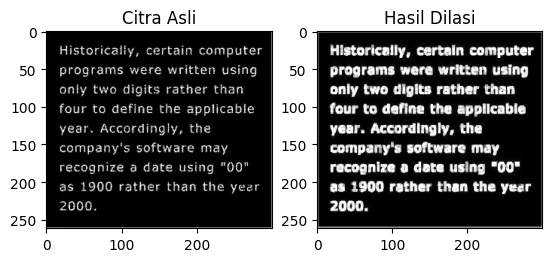

In [8]:
# Fungsi untuk melakukan dilasi pada citra
def dilasi(image, sed):
    # Mengambil ukuran citra dan SED
    height, width = image.shape
    sed_size = sed.shape[0]

    # Membuat citra output dengan ukuran yang sama dengan citra input
    output_image = np.zeros((height, width), dtype=np.uint8)

    # Loop melalui semua piksel pada citra input
    for i in range(height):
        for j in range(width):
            # Inisialisasi nilai maksimum untuk dilasi
            max_value = 0

            # Loop melalui SED
            for m in range(sed_size):
                for n in range(sed_size):
                    # Koordinat piksel SED
                    sed_x = m - (sed_size // 2)
                    sed_y = n - (sed_size // 2)

                    # Koordinat piksel citra yang akan diuji
                    image_x = i + sed_x
                    image_y = j + sed_y

                    # Periksa apakah koordinat dalam batas citra
                    if (image_x >= 0 and image_x < height and image_y >= 0 and image_y < width):
                        # Periksa nilai piksel di citra asli
                        pixel_value = image[image_x, image_y]

                        # Perbarui nilai maksimum jika ditemukan nilai yang lebih besar
                        max_value = max(max_value, pixel_value)

            # Set nilai piksel pada citra output dengan nilai maksimum yang ditemukan
            output_image[i, j] = max_value

    return output_image

# Membaca citra
image =  cv2.imread('/content/drive/MyDrive/PCVK_Gambar/morphology.jpeg',0)

# Structuring Element Dilasi (SED) berbentuk cross 3x3
sed = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]], dtype=np.uint8)

# Melakukan dilasi pada citra
dilated_image = dilasi(image, sed)

# Menampilkan citra asli dan citra hasil dilasi
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Citra Asli')
plt.subplot(122), plt.imshow(dilated_image, cmap='gray'), plt.title('Hasil Dilasi')
plt.show()


## 4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar morphology.png, dan cetak Structuring Element-nya)

Structuring Element (SED):
[[0 1 0]
 [1 1 1]
 [0 1 0]]


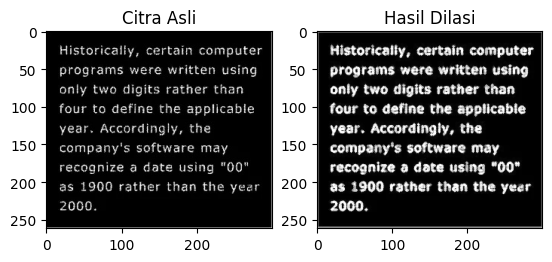

In [10]:
# Membaca citra
image =  cv2.imread('/content/drive/MyDrive/PCVK_Gambar/morphology.jpeg',0)

# Structuring Element Dilasi (SED) berbentuk cross 3x3
sed = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Melakukan dilasi pada citra
dilated_image = cv2.dilate(image, sed)

# Menampilkan citra asli dan citra hasil dilasi
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Citra Asli')
plt.subplot(122), plt.imshow(dilated_image, cmap='gray'), plt.title('Hasil Dilasi')

# Cetak Structuring Element (SED)
print("Structuring Element (SED):")
print(sed)

plt.show()


## 5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)


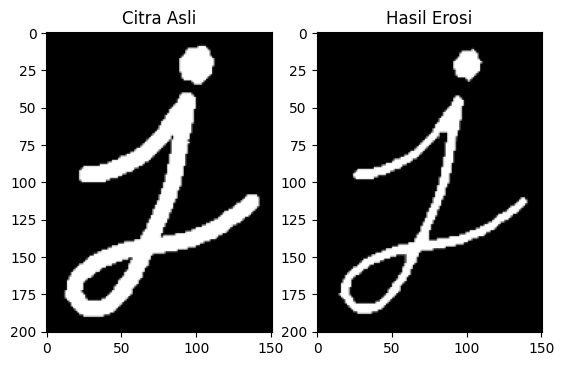

In [11]:
# Fungsi untuk melakukan erosi pada citra
def erosi(image, se):
    # Mengambil ukuran citra dan SE
    height, width = image.shape
    se_size = se.shape[0]

    # Membuat citra output dengan ukuran yang sama dengan citra input
    output_image = np.zeros((height, width), dtype=np.uint8)

    # Loop melalui semua piksel pada citra input
    for i in range(height):
        for j in range(width):
            # Inisialisasi nilai minimum untuk erosi
            min_value = 255

            # Loop melalui SE
            for m in range(se_size):
                for n in range(se_size):
                    # Koordinat piksel SE
                    se_x = m - (se_size // 2)
                    se_y = n - (se_size // 2)

                    # Koordinat piksel citra yang akan diuji
                    image_x = i + se_x
                    image_y = j + se_y

                    # Periksa apakah koordinat dalam batas citra
                    if (image_x >= 0 and image_x < height and image_y >= 0 and image_y < width):
                        # Periksa nilai piksel di citra asli
                        pixel_value = image[image_x, image_y]

                        # Perbarui nilai minimum jika ditemukan nilai yang lebih kecil
                        min_value = min(min_value, pixel_value)

            # Set nilai piksel pada citra output dengan nilai minimum yang ditemukan
            output_image[i, j] = min_value

    return output_image

# Membaca citra
image = cv2.imread('/content/drive/MyDrive/PCVK_Gambar/j.png',0)

# Structuring Element Erosi (SE) berbentuk square 5x5
se = np.ones((5, 5), dtype=np.uint8)

# Melakukan erosi pada citra
eroded_image = erosi(image, se)

# Menampilkan citra asli dan citra hasil erosi
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Citra Asli')
plt.subplot(122), plt.imshow(eroded_image, cmap='gray'), plt.title('Hasil Erosi')
plt.show()


## 6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)


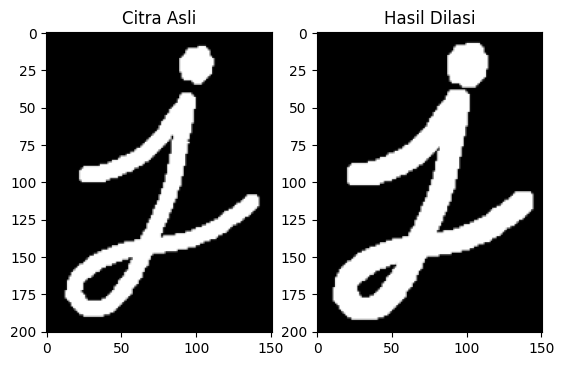

In [16]:
# Membaca citra
image = cv2.imread('/content/drive/MyDrive/PCVK_Gambar/j.png',0)

# Structuring Element Erosi (SE) berbentuk square 5x5
se = np.ones((5, 5), dtype=np.uint8)

# Melakukan dilasi pada citra
dilated_image = cv2.dilate(image, se)

# Menampilkan citra asli dan citra hasil dilasi
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Citra Asli')
plt.subplot(122), plt.imshow(dilated_image, cmap='gray'), plt.title('Hasil Dilasi')
plt.show()


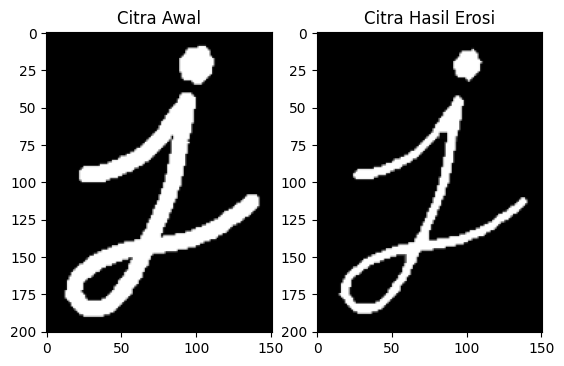

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra 'j.png' dalam format grayscale
img = cv2.imread('/content/drive/MyDrive/PCVK_Gambar/j.png',0)

# Tentukan Struktur erosi sebagai square 5x5
kernel = np.ones((5, 5), np.uint8)

# Lakukan erosi pada citra
erosion = cv2.erode(img, kernel, iterations=1)

# Tampilkan citra asli dan citra hasil erosi
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.show()


## 7. Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar fingerprint.png)


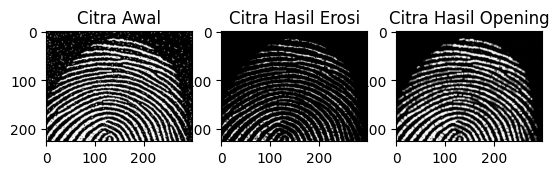

In [31]:
# Baca citra 'j.png dalam format grayscale
img = cv2.imread('/content/drive/MyDrive/PCVK_Gambar/fingerprint.jpeg',0)

# Tentukan ukuran Structuring Element (SE) berbentuk square 3x3
SE_size = 3
SE = np.ones((SE_size, SE_size), dtype=np.uint8)

# Lakukan erosi dengan SE 3x3 pada citra
eroded_img = cv2.erode(img, SE)

# Lakukan dilasi dengan SE 3x3 pada citra hasil erosi
opened_img = cv2.dilate(eroded_img, SE)

# Tampilkan citra awal, citra hasil erosi, dan citra hasil opening
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(eroded_img, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.subplot(133), plt.imshow(opened_img, cmap='gray'), plt.title('Citra Hasil Opening')
plt.show()



## 8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar fingerprint.png)

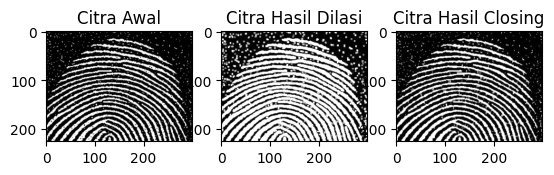

In [32]:
# Baca citra 'fingerprint.png' dalam format grayscale
img = cv2.imread('/content/drive/MyDrive/PCVK_Gambar/fingerprint.jpeg',0)

# Tentukan ukuran Structuring Element (SE) berbentuk square 3x3
SE_size = 3
SE = np.ones((SE_size, SE_size), dtype=np.uint8)

# Lakukan dilasi dengan SE 3x3 pada citra
dilated_img = cv2.dilate(img, SE)

# Lakukan erosi dengan SE 3x3 pada citra hasil dilasi
closed_img = cv2.erode(dilated_img, SE)

# Tampilkan citra awal, citra hasil dilasi, dan citra hasil closing
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(dilated_img, cmap='gray'), plt.title('Citra Hasil Dilasi')
plt.subplot(133), plt.imshow(closed_img, cmap='gray'), plt.title('Citra Hasil Closing')
plt.show()


## 9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)


SED = Cross 3


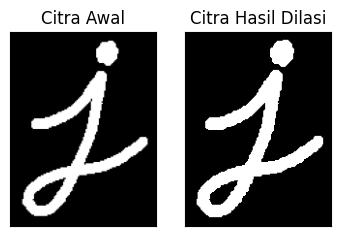

SED = Cross 5


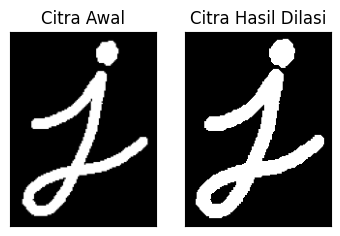

In [37]:
# Fungsi Dilasi Cross SED
def dilasi_citra(F, w):
    # Ukuran citra
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)

    # Membuat elemen struktur dilasi (SED) Cross 3
    SED_3 = np.array([[0, 1, 0],
                     [1, 1, 1],
                     [0, 1, 0]], dtype=np.uint8)

    # Membuat elemen struktur dilasi (SED) Cross 5
    SED_5 = np.array([[0, 0, 1, 0, 0],
                     [0, 0, 1, 0, 0],
                     [1, 1, 1, 1, 1],
                     [0, 0, 1, 0, 0],
                     [0, 0, 1, 0, 0]], dtype=np.uint8)

    SED = SED_3 if w == 3 else SED_5
    constant1 = (w - 1) // 2

    # Proses Dilasi
    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            temp = F[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            product = temp * SED
            imgD[i, j] = np.max(product)

    return imgD

# Baca citra 'j.png' dalam format grayscale
img_d = cv2.imread('/content/drive/MyDrive/PCVK_Gambar/j.png',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w_3 = 3
w_5 = 5

# Dilasi Cross SED dengan w = 3
imgD_3 = dilasi_citra(thresh, w_3)
print('SED = Cross 3')
plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD_3, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

# Dilasi Cross SED dengan w = 5
imgD_5 = dilasi_citra(thresh, w_5)
print('SED = Cross 5')
plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD_5, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

## Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

SED = Circle 3


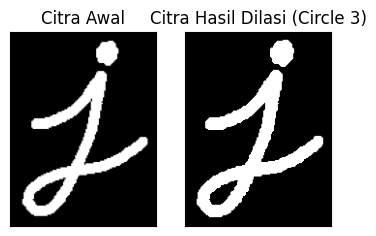

SED = Circle 5


(Text(0.5, 1.0, 'Citra Hasil Dilasi (Circle 5)'),
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>)

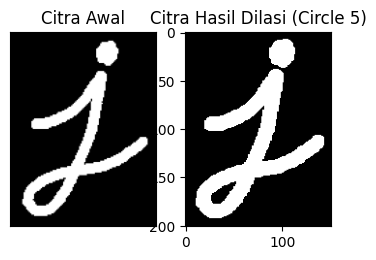

In [42]:
# Fungsi Dilasi Circular SED
def dilasi_citra(F, w):
    # Ukuran citra
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)

    # Membuat elemen struktur dilasi (SED) Circular
    SED = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (w, w))
    constant1 = (w - 1) // 2

    # Proses Dilasi
    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            temp = F[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]
            product = temp * SED
            imgD[i, j] = np.max(product)

    return imgD

# Membaca citra
img_d = cv2.imread('/content/drive/MyDrive/PCVK_Gambar/j.png',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w_3 = 3
w_5 = 5

# Dilasi Circular SED dengan w = 3
imgD_3 = dilasi_citra(thresh, w_3)
print('SED = Circle 3')
plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD_3, cmap='gray')
plt.title('Citra Hasil Dilasi (Circle 3)'), plt.xticks([]), plt.yticks([])
plt.show()

# Dilasi Circular SED dengan w = 5
imgD_5 = dilasi_citra(thresh, w_5)
print('SED = Circle 5')
plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD_5, cmap='gray')
plt.title('Citra Hasil Dilasi (Circle 5)'), plt


## 11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)


SE = Rectangle 3x5


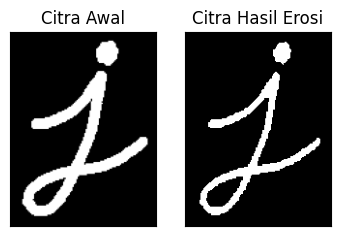

SE = Rectangle 5x7


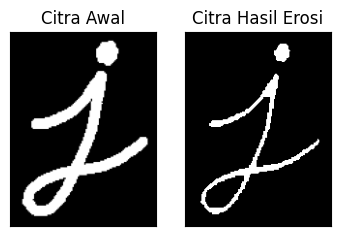

In [43]:
# Fungsi Erosi Cross SE
def erosi_citra(F, p, l):
    # Ukuran citra
    m, n = F.shape

    # Membuat elemen struktur erosi (SE) persegi panjang
    SE = cv2.getStructuringElement(cv2.MORPH_RECT, (p, l))
    constant1 = (l - 1) // 2
    constant2 = (p - 1) // 2

    imgE = np.zeros((m, n), dtype=np.uint8)

    # Proses Erosi
    for i in range(constant1, m - constant1):
        for j in range(constant2, n - constant2):
            temp = F[i - constant1:i + constant1 + 1, j - constant2:j + constant2 + 1]
            product = temp * SE
            imgE[i, j] = np.min(product)

    return imgE

# Erosi dengan SE Rectangle 3x5
print('SE = Rectangle 3x5')
img_e = cv2.imread('/content/drive/MyDrive/PCVK_Gambar/j.png',0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p_3x5 = 5
l_3x5 = 3
imgE_3x5 = erosi_citra(thresh1, p_3x5, l_3x5)

plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE_3x5, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

# Erosi dengan SE Rectangle 5x7
print('SE = Rectangle 5x7')
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p_5x7 = 7
l_5x7 = 5
imgE_5x7 = erosi_citra(thresh1, p_5x7, l_5x7)

plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE_5x7, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

## 12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

SE = Line Vertikal 3


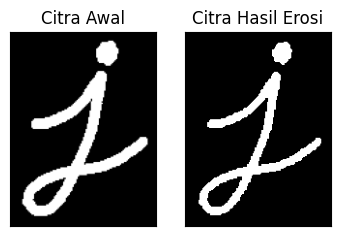

SE = Line Vertikal 5


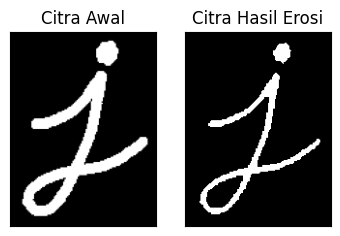

In [44]:
# Fungsi Erosi Line Vertikal SE
def erosi_citra(F, k):
    # Ukuran citra
    m, n = F.shape

    # Membuat elemen struktur erosi (SE) line vertikal
    SE = cv2.getStructuringElement(cv2.MORPH_RECT, (1, k))
    constant = (k - 1) // 2
    imgE = np.zeros((m, n), dtype=np.uint8)

    # Proses Erosi
    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SE
            imgE[i, j] = np.min(product)

    return imgE


img_e = cv2.imread('/content/drive/MyDrive/PCVK_Gambar/j.png',0)

# Erosi dengan SE Line Vertikal 3
print('SE = Line Vertikal 3')
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
k_3 = 3
imgE_3 = erosi_citra(thresh1, k_3)

plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE_3, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

# Erosi dengan SE Line Vertikal 5
print('SE = Line Vertikal 5')
k_5 = 5
imgE_5 = erosi_citra(thresh1, k_5)

plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE_5, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()